# NSL-KDD

The NSL-KDD dataset is an improved version of the KDD'99 dataset, which was widely used for network intrusion detection. The original dataset had many redundant records, and NSL-KDD addressed these issues. It contains both normal and attack records.

**Attacks Covered**: Includes various types of attacks such as Denial of Service (DoS), Probe, R2L (Remote-to-Local), and U2R (User-to-Root).

In [1]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

## Step 1. EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

columns = [
    'duration','protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
	'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
	'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
	'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
	'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
	'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
	'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
	'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
	'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
	'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
	'label','idk' # Target column
]

df_train = pd.read_csv("./KDDTrain+.txt", header=None)
df_test = pd.read_csv("./KDDTest+.txt", header=None)

df_train.reset_index(drop=True, inplace=True)
df_train.columns = columns

df_test.reset_index(drop=True, inplace=True)
df_test.columns = columns

df_train.drop(columns=['idk'], inplace=True)
df_test.drop(columns=['idk'], inplace=True)



In [3]:
df_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df_train.shape

(125973, 42)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [6]:
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

## Step 2. Data Cleaning

### A. Missing values

In [8]:
print(df_train.isna().sum().sum())
print(df_test.isna().sum().sum())

0
0


## Step 3. Data Preparation

### A. Categorical data

In [9]:
categorical_columns = df_train.select_dtypes(include=['object']).columns

for column in categorical_columns:
	print(f"Column '{column}'		contains {len(df_train[column].value_counts())} unique values")

Column 'protocol_type'		contains 3 unique values
Column 'service'		contains 70 unique values
Column 'flag'		contains 11 unique values
Column 'label'		contains 23 unique values


#### Retain only the top 10 unique values for every categorical column

I do this, so that one-hot-encoding won't result in 10.000 columns

In [10]:
def filter_top_10_categories(df):
	"""
	Loops over all categorical columns in the DataFrame and keeps only the rows
	where the categorical values are within the top 10 most frequent.
	
	Parameters:
	df (pd.DataFrame): The input DataFrame
	
	Returns:
	pd.DataFrame: A filtered DataFrame with rows kept only if they belong to the top 10 categories.
	"""

	df_filtered = df.copy()

	# Loop through all columns in the DataFrame
	for col in df_filtered.select_dtypes(include="object").columns:

		# Step 1: Get value counts for the categorical column
		value_counts = df_filtered[col].value_counts()

		# Step 2: Get the top 10 most frequent categories
		top_10_categories = value_counts.head(10).index

		# Step 3: Filter the DataFrame to keep only rows with the top 10 categories
		df_filtered = df_filtered[df_filtered[col].isin(top_10_categories)]
	
	return df_filtered

In [11]:
df_train_filtered = filter_top_10_categories(df_train)
df_test_filtered = filter_top_10_categories(df_test)

In [12]:
df_train_filtered.to_csv("./data/cleaned/KDDTrain_filtered.csv", index=False)
df_test_filtered.to_csv("./data/cleaned/KDDTest_filtered.csv", index=False)

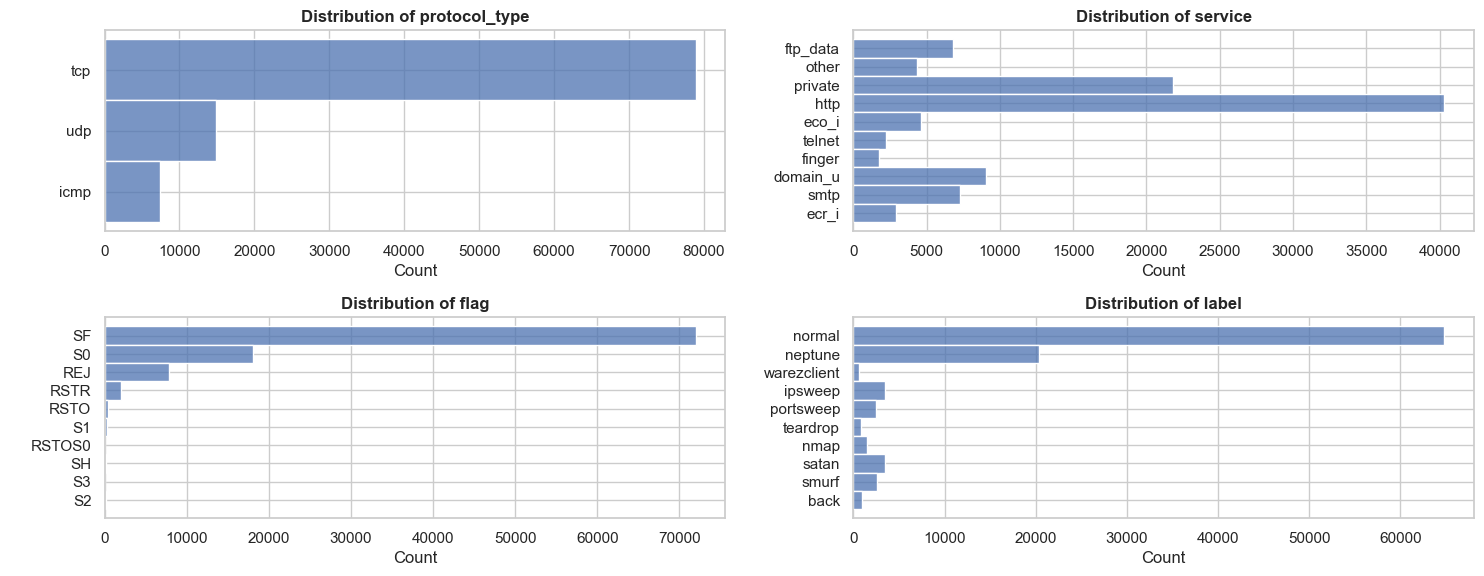

In [13]:
df = df_train_filtered

plt.figure(figsize=(15, 60))
for i, column in enumerate(categorical_columns):
	plt.subplot(len(df.columns)//2 + len(df.columns)%2, 2, i+1)
	sns.histplot(data=df, y=df[column])
	plt.ylabel(" ")
	plt.title(f"Distribution of {column}", fontweight="bold")

plt.tight_layout()
plt.show()

#### One-hot-encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df_train_filtered.select_dtypes(include="object").columns.drop("label")

le = LabelEncoder()
for column in categorical_columns:
	df_test_filtered[column] = le.fit_transform(df_test_filtered[column])
	df_train_filtered[column] = le.fit_transform(df_train_filtered[column])

df_train_filtered.to_csv("./data/encoded/KDDTrain_encoded.csv", index=False)
df_test_filtered.to_csv("./data/encoded/KDDTest_encoded.csv", index=False)

In [15]:
df_train_encoded = pd.read_csv("./data/encoded/KDDTrain_encoded.csv")
df_test_encoded = pd.read_csv("./data/encoded/KDDTest_encoded.csv")

In [16]:
if (len(df_train_encoded.columns) - len(df_train_encoded.select_dtypes(include="number").columns) == 1):
	print("All values are numerical except the target column")

if (len(df_test_encoded.columns) - len(df_test_encoded.select_dtypes(include="number").columns) == 1):
	print("All values are numerical except the target column")

All values are numerical except the target column
All values are numerical except the target column


## Step 4. Preparing dataset for modeling

### A. Normalise numeric features

In [17]:
# Get all numerical columns
numerical_columns = df_train_encoded.select_dtypes(include="number").columns

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train_encoded[numerical_columns] = scaler.fit_transform(df_train_encoded[numerical_columns])
df_test_encoded[numerical_columns] = scaler.fit_transform(df_test_encoded[numerical_columns])

### B. Map Labels to Multi-class

In [19]:
df_train_encoded["label"].value_counts()

label
normal         64822
neptune        20348
ipsweep         3506
satan           3473
smurf           2646
portsweep       2477
nmap            1454
back             956
teardrop         892
warezclient      584
Name: count, dtype: int64

In [20]:
attack_mapping = {
	"normal": 0,
	"neptune": 1,
	"ipsweep": 2,
	"satan": 3,
	"smurf": 4,
	"portsweep": 5,
	"nmap": 6,
	"back": 7,
	"teardrop": 8,
	"warezclient": 9,
}

df["label"] = df["label"].map(attack_mapping)

In [21]:
df["label"].value_counts()

label
0    64822
1    20348
2     3506
3     3473
4     2646
5     2477
6     1454
7      956
8      892
9      584
Name: count, dtype: int64

### C. Data Splitting

In [22]:
df = df_train_encoded
df_test = df_test_encoded

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="label")
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### D. PyTorch Model Design

In [24]:
import torch
import torch.nn as nn

class NetworkIDSModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NetworkIDSModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.softmax(x)

# Define the input size (number of features), hidden layers, and output size (number of classes)
input_size = X_train.shape[1]
hidden_size = 64  # You can experiment with this
output_size = len(attack_mapping)  # Depends on binary or multi-class

model = NetworkIDSModel(input_size, hidden_size, output_size)

### E. Training the Model

In [25]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

# Convert the data to PyTorch tensors
# Ensure labels are mapped to integers
y_train_mapped = y_train.map(attack_mapping).astype(int)
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_mapped.values, dtype=torch.int64)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
	total_loss = 0
	correct = 0
	total = 0
	
	for data, labels in train_loader:
		# Zero the gradients
		optimizer.zero_grad()
		
		# Forward pass
		outputs = model(data)
		loss = criterion(outputs, labels)
		
		# Backward pass and optimize
		loss.backward()
		optimizer.step()
		
		# Track loss
		total_loss += loss.item()
		
		# Calculate accuracy
		_, predicted = torch.max(outputs.data, 1)
		total += labels.size(0)
		correct += (predicted == labels).sum().item()
	
	epoch_loss = total_loss / len(train_loader)
	epoch_accuracy = correct / total
	
	print(f'[Epoch {epoch+1}/{num_epochs}]:	loss: {epoch_loss:.4f} ; accuracy: {epoch_accuracy:.4f}')

[Epoch 1/50]:	loss: 1.6507 ; accuracy: 0.8323
[Epoch 2/50]:	loss: 1.5826 ; accuracy: 0.8800
[Epoch 3/50]:	loss: 1.5363 ; accuracy: 0.9275
[Epoch 4/50]:	loss: 1.5319 ; accuracy: 0.9301
[Epoch 5/50]:	loss: 1.5294 ; accuracy: 0.9326
[Epoch 6/50]:	loss: 1.5216 ; accuracy: 0.9412
[Epoch 7/50]:	loss: 1.5182 ; accuracy: 0.9437
[Epoch 8/50]:	loss: 1.5173 ; accuracy: 0.9441
[Epoch 9/50]:	loss: 1.5168 ; accuracy: 0.9443
[Epoch 10/50]:	loss: 1.5165 ; accuracy: 0.9445
[Epoch 11/50]:	loss: 1.5163 ; accuracy: 0.9445
[Epoch 12/50]:	loss: 1.5161 ; accuracy: 0.9446
[Epoch 13/50]:	loss: 1.5160 ; accuracy: 0.9448
[Epoch 14/50]:	loss: 1.5159 ; accuracy: 0.9447
[Epoch 15/50]:	loss: 1.5157 ; accuracy: 0.9448
[Epoch 16/50]:	loss: 1.5157 ; accuracy: 0.9449
[Epoch 17/50]:	loss: 1.5156 ; accuracy: 0.9449
[Epoch 18/50]:	loss: 1.5155 ; accuracy: 0.9449
[Epoch 19/50]:	loss: 1.5155 ; accuracy: 0.9450
[Epoch 20/50]:	loss: 1.5155 ; accuracy: 0.9449
[Epoch 21/50]:	loss: 1.5154 ; accuracy: 0.9449
[Epoch 22/50]:	loss: 1

### F. Evaluating the Model

In [26]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Convert test data to tensor
y_test_mapped = y_test.map(attack_mapping).astype(int)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_mapped.values, dtype=torch.long)

# Make predictions
model.eval()
with torch.no_grad():
	outputs = model(X_test_tensor)
	_, predicted = torch.max(outputs.data, 1)

# Calculate accuracy
accuracy = accuracy_score(y_test_tensor.numpy(), predicted.numpy())

# Calculate F1 score
f1 = f1_score(y_test_tensor.numpy(), predicted.numpy(), average="weighted")

# Generate classification report
# Assuming `attack_mapping` has a reverse mapping or a list of class names is available
class_names = list(attack_mapping.keys())
report = classification_report(y_test_tensor.numpy(), predicted.numpy(),
			target_names=class_names)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"\nClassification Report:\n{report}")

Accuracy: 0.9467
F1 Score: 0.9239

Classification Report:
              precision    recall  f1-score   support

      normal       0.94      1.00      0.97     12992
     neptune       1.00      1.00      1.00      4043
     ipsweep       0.00      0.00      0.00       706
       satan       0.97      0.98      0.98       711
       smurf       1.00      1.00      1.00       511
   portsweep       0.98      0.99      0.99       501
        nmap       0.57      0.82      0.67       312
        back       0.00      0.00      0.00       179
    teardrop       1.00      1.00      1.00       166
 warezclient       0.00      0.00      0.00       111

    accuracy                           0.95     20232
   macro avg       0.65      0.68      0.66     20232
weighted avg       0.90      0.95      0.92     20232



In [27]:
torch.save(model.state_dict(), './models/ids_model.pth')

In [28]:
model.load_state_dict(torch.load('./models/ids_model.pth', weights_only=True))
model.eval()

NetworkIDSModel(
  (fc1): Linear(in_features=41, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)